# Visual exploratory data analysis
### Analyzing Police Activity with pandas
#### Career track : Data Analyts with Python
#### DataCamp - 2020
#### Karen Jimenez

In [6]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt


# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('data/police.csv')

## Calculating the hourly arrest rate

In [7]:
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

ri['stop_datetime'] = pd.to_datetime(combined)
ri['is_arrested'] = ri['is_arrested'].astype(bool)

ri.set_index('stop_datetime', inplace=True)

In [8]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.09025408486936048
stop_datetime
0     0.121206
1     0.144250
2     0.144120
3     0.148370
4     0.179310
5     0.178899
6     0.043614
7     0.053497
8     0.073591
9     0.070199
10    0.069306
11    0.075217
12    0.087040
13    0.078964
14    0.080171
15    0.080526
16    0.089505
17    0.107914
18    0.089883
19    0.078508
20    0.091482
21    0.153265
22    0.110715
23    0.108225
Name: is_arrested, dtype: float64


## Plotting the hourly arrest rate

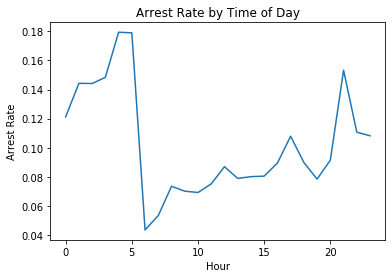

In [9]:
# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

<i> The arrest rate has a significant spike overnight, and then dips in the early morning hours
<hr>